<a href="https://colab.research.google.com/github/skfo763/Google-ML-Bootcamp/blob/main/phase2/course1/week2/Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [30]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [31]:
class AccuracyCallback(tf.keras.callbacks.Callback):
  def on_epocn_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.99):
      print("\n정확도가 99%를 넘겼으므로 학습을 중단합니다.")
      self.model.stop_training = True

In [32]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(train_x.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


In [33]:
train_x = train_x / 255.0
test_x = test_x / 255.0
callback = AccuracyCallback()

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_x, train_y, epochs=10, callbacks=[callback], verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3733 - accuracy: 0.8927
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0982 - accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.009

In [36]:
model.evaluate(test_x, test_y)
classifications = model.predict(test_x)

313/313 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9796


2


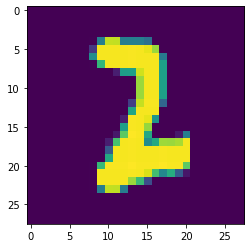

In [47]:
import matplotlib.pyplot as plt
import numpy as np
test_index = np.random.randint(0, len(test_x))

plt.imshow(train_x[test_index])
print(train_y[test_index])

In [48]:
print(classifications[test_index])
print(test_y[test_index])

[3.1320827e-16 3.0793066e-07 9.9999785e-01 1.8870002e-06 1.0058118e-10
 9.1578280e-15 4.7783321e-13 4.2626502e-09 8.1481013e-13 6.6548395e-25]
2
